# XGBOOST

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import neighbors
from sklearn.svm import SVR

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

In [3]:
df = pd.read_csv("Hitters.csv")
df = df.dropna()
dms = pd.get_dummies(df[["League", "Division", "NewLeague"]])
y = df["Salary"]
X_ = df.drop(["Salary", "League", "Division", "NewLeague"], axis=1).astype("float64")
X = pd.concat([X_, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.25,
                                                    random_state=42)

### MODEL & TRAINING

In [4]:
!pip install xgboost

You should consider upgrading via the 'c:\users\ertug\anaconda3\python.exe -m pip install --upgrade pip' command.


In [7]:
import xgboost
from xgboost import XGBRegressor

In [8]:
xgboost_model = XGBRegressor().fit(X_train, y_train)

In [9]:
y_pred = xgboost_model.predict(X_test)

In [10]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

355.4651481224188

In [11]:
r2_score(y_test, y_pred)

0.4163068320833353

### MODEL TUNING

In [12]:
dir(xgboost_model)

['_Booster',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_data',
 'apply',
 'base_score',
 'booster',
 'coef_',
 'colsample_bylevel',
 'colsample_bynode',
 'colsample_bytree',
 'evals_result',
 'feature_importances_',
 'fit',
 'gamma',
 'get_booster',
 'get_num_boosting_rounds',
 'get_params',
 'get_xgb_params',
 'gpu_id',
 'importance_type',
 'interaction_constraints',
 'intercept_',
 'kwargs',
 'learning_rate',
 'load_model',
 'max_delta_step',
 'max_depth',
 'min_child_w

In [13]:
?xgboost_model

Type:        XGBRegressor
String form:
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
           colsample_bynode <...> s_weight=1, subsample=1,
           tree_method='exact', validate_parameters=1, verbosity=None)
File:        c:\users\ertug\anaconda3\lib\site-packages\xgboost\sklearn.py
Docstring:  
Implementation of the scikit-learn API for XGBoost regression.


Parameters
----------

    n_estimators : int
        Number of gradient boosted trees.  Equivalent to number of boosting
        rounds.

    max_depth : int
        Maximum tree depth for base learners.
    learning_rate : float
        Boosting learning rate (xgb's "eta")
    verbosity : int
        The degree of verbosity. Valid values are 0 (silent) - 3 (debug).
    objective : string or callable
        Specify the learning task and the corresponding learning objective or
        a custom objective function to be used (see note below).
    booster: string
        Specify which booster to use: gbtr

In [14]:
xgb_params = {'learning_rate': [.1, .01, .05],
              "max_depth": [2, 3, 4, 5, 8],
              "n_estimators": [100, 200, 500, 1000],
              "colsample_bytree": [.4, .7, 1.0]}

In [15]:
xgb_cv_model = GridSearchCV(xgboost_model, xgb_params, cv=10, verbose=2, n_jobs=-1).fit(X_train, y_train)

Fitting 10 folds for each of 180 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.0s
[Parallel(n_jobs=-1)]: Done 264 tasks      | elapsed:   30.2s
[Parallel(n_jobs=-1)]: Done 670 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1120 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 1485 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  4.6min finished


In [16]:
xgb_cv_model.best_params_

{'colsample_bytree': 0.4,
 'learning_rate': 0.1,
 'max_depth': 2,
 'n_estimators': 1000}

In [17]:
xgb_tuned = XGBRegressor(learning_rate=xgb_cv_model.best_params_.get("learning_rate"),
                         max_depth=xgb_cv_model.best_params_.get("max_depth"),
                         n_estimators=xgb_cv_model.best_params_.get("n_estimators"),
                         colsample_bytree=xgb_cv_model.best_params_.get("colsample_bytree")).fit(X_train,
                                                                                                 y_train)

In [18]:
y_pred = xgb_tuned.predict(X_test)

In [19]:
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))
RMSE

367.8515297956715

In [20]:
r2_score(y_test, y_pred)

0.37491987522159576

Text(0.5, 0, 'Variable Importance')

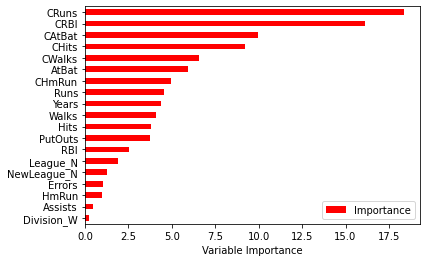

In [22]:
Importance = pd.DataFrame({"Importance":xgb_tuned.feature_importances_*100},
                           index=X_train.columns)
Importance.sort_values(by="Importance",
                       axis=0,
                       ascending=True).plot(kind="barh",
                                            color="r")  # ascerding --> büyükten küçüğe
plt.xlabel("Variable Importance")
# plt.gca().legend_ = None